# Install

In [ ]:
!pip3 install torch==1.12+cpu torchvision==0.13.0+cpu torchtext==0.13.0 -f https://download.pytorch.org/whl/cpu/torch_stable.html

!pip3 install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cpu/torch_stable.html
     |████████████████████████████████| 189.0 MB 10 kB/s 
     |████████████████████████████████| 13.5 MB 35.7 MB/s 
     |████████████████████████████████| 1.9 MB 7.8 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully uninstalled torch-1.12.1+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.13.1+cu113
    Uninstalling torchvision-0.13.1+cu113:
      Successfully uninstalled torchvision-0.13.1+cu113
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.13.1
    Uninstalling torchtext-0.13.1:
      Successfully uninstalled torchtext-0.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is 

In [ ]:
import pandas as pd

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import train_test_split

In [ ]:
path = "/content/drive/MyDrive/colab/Data mining/Midterm exam/refined_data.csv"
save_path = "/content/drive/MyDrive/colab/Data mining/Midterm exam/models"

# First Fit in Gluon 

In [ ]:
cat_df = pd.read_csv("/content/drive/MyDrive/colab/Data mining/Midterm exam/refined_data.csv", index_col="Unnamed: 0")
cat_df.head()

,name,outcome_type,sex_upon_outcome,Cat/Kitten (outcome),age_group,dob_month,outcome_month,outcome_weekday,outcome_hour,breed1,breed2,cfa_breed,domestic_breed,coat_pattern,color1,color2,coat
0,0,Transfer,0.0,0,0,7,7,0,16,0,-1.0,False,True,0.0,0,-1.0,0
1,0,Adoption,1.0,0,0,6,8,1,18,0,-1.0,False,True,0.0,1,1.0,1
2,0,Adoption,2.0,0,0,3,6,2,17,0,-1.0,False,True,-1.0,2,2.0,2
3,0,Return to Owner,2.0,1,0,3,3,3,14,1,-1.0,False,True,-1.0,3,1.0,3
4,0,Transfer,0.0,0,0,12,1,1,19,0,-1.0,False,True,-1.0,3,1.0,3


In [ ]:
cat_df["cfa_breed"] = cat_df["cfa_breed"].apply(lambda x: 1 if True else 0)
cat_df["domestic_breed"] = cat_df["domestic_breed"].apply(lambda x: 1 if True else 0)

In [ ]:
label = "outcome_type"
X, y = cat_df.drop(label, axis=1), cat_df[label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)
X_train, y_train

(       name  sex_upon_outcome  Cat/Kitten (outcome)  age_group  dob_month  \
 20991     0               0.0                     0          0          5   
 16392     0               2.0                     0          0          9   
 21094     0               4.0                     1          1          9   
 15076     0               1.0                     0          0          6   
 10073     0               4.0                     1          0          5   
 ...     ...               ...                   ...        ...        ...   
 9673      0               2.0                     0          0          9   
 7559      0               2.0                     0          0         11   
 18422     0               4.0                     0          0          3   
 7561      0               4.0                     1          1          7   
 18364     0               4.0                     1          1         10   
 
        outcome_month  outcome_weekday  outcome_hour  breed1  

In [ ]:
predictor = TabularPredictor(label="outcome_type", path=save_path)

In [ ]:
predictor.fit(pd.concat([X_train, y_train], axis=1), time_limit=180, presets='best_quality')
# predictor.fit(pd.concat([X, y], axis=1))

Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 180s
AutoGluon will save models to "/content/drive/MyDrive/colab/Data mining/Midterm exam/models/"
AutoGluon Version:  0.6.0
Python Version:     3.8.15
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    20206
Train Data Columns: 16
Label Column: outcome_type
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == object).
	9 unique label values:  ['Adoption', 'Return to Owner', 'Transfer', 'Euthanasia', 'Disposal', 'Died', 'Missing', 'Rto-Adopt', '-1']
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Fraction of data from classe

# Evaluate

In [ ]:
#evaluate
y_pred = predictor.predict(X_test)
y_pred

885      Adoption
1733     Adoption
520      Transfer
20398    Transfer
229      Adoption
           ...   
21139    Transfer
842      Adoption
11097    Transfer
18783    Adoption
16569    Transfer
Name: outcome_type, Length: 2246, dtype: object

In [ ]:
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: accuracy on test data: 0.7622439893143366
Evaluations on test data:
{
    "accuracy": 0.7622439893143366,
    "balanced_accuracy": 0.23277175910729359,
    "mcc": 0.5871299880342093
}


In [ ]:
predictor.leaderboard(pd.concat([X_test, y_test], axis=1), silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.762244,0.764415,0.887889,2.669788,104.754212,0.008868,0.002897,2.473738,2,True,4
1,NeuralNetFastAI_BAG_L2,0.762244,0.764563,1.848261,6.824047,167.652690,0.703762,0.810019,65.275450,2,True,5
2,WeightedEnsemble_L3,0.762244,0.764563,1.852336,6.830050,167.692854,0.004074,0.006003,0.040164,3,True,6
3,NeuralNetFastAI_BAG_L1,0.760463,0.764019,0.608356,0.669309,102.198744,0.608356,0.669309,102.198744,1,True,3
4,KNeighborsDist_BAG_L1,0.708816,0.715318,0.270665,1.997582,0.081729,0.270665,1.997582,0.081729,1,True,2
5,KNeighborsUnif_BAG_L1,0.699466,0.710715,0.265478,3.347136,0.096766,0.265478,3.347136,0.096766,1,True,1


In [ ]:
predictor.get_model_best()

'WeightedEnsemble_L3'

#Feature importance

In [ ]:
#@title weights of features, the larger weights, the higher importance
predictor.feature_importance(pd.concat([X_test, y_test], axis=1))

These features in provided data are not utilized by the predictor and will be ignored: ['name', 'cfa_breed', 'domestic_breed']
Computing feature importance via permutation shuffling for 13 features using 2245 rows with 5 shuffle sets...
	112.18s	= Expected runtime (22.44s per shuffle set)
	79.16s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
sex_upon_outcome,0.210958,0.004256,1.987194e-08,5,0.219721,0.202194
outcome_month,0.046503,0.006752,5.187620e-05,5,0.060407,0.032600
outcome_hour,0.042494,0.003143,3.566848e-06,5,0.048967,0.036022
dob_month,0.040356,0.005143,3.097299e-05,5,0.050945,0.029767
Cat/Kitten (outcome),0.024766,0.003267,3.551695e-05,5,0.031493,0.018039
age_group,0.010245,0.000704,2.663289e-06,5,0.011695,0.008795
outcome_weekday,0.009889,0.004481,3.923632e-03,5,0.019115,0.000662
color1,0.001336,0.002500,1.490074e-01,5,0.006484,-0.003811
breed1,0.001158,0.002007,1.332322e-01,5,0.005290,-0.002974
coat_pattern,0.000713,0.001957,2.305661e-01,5,0.004742,-0.003317


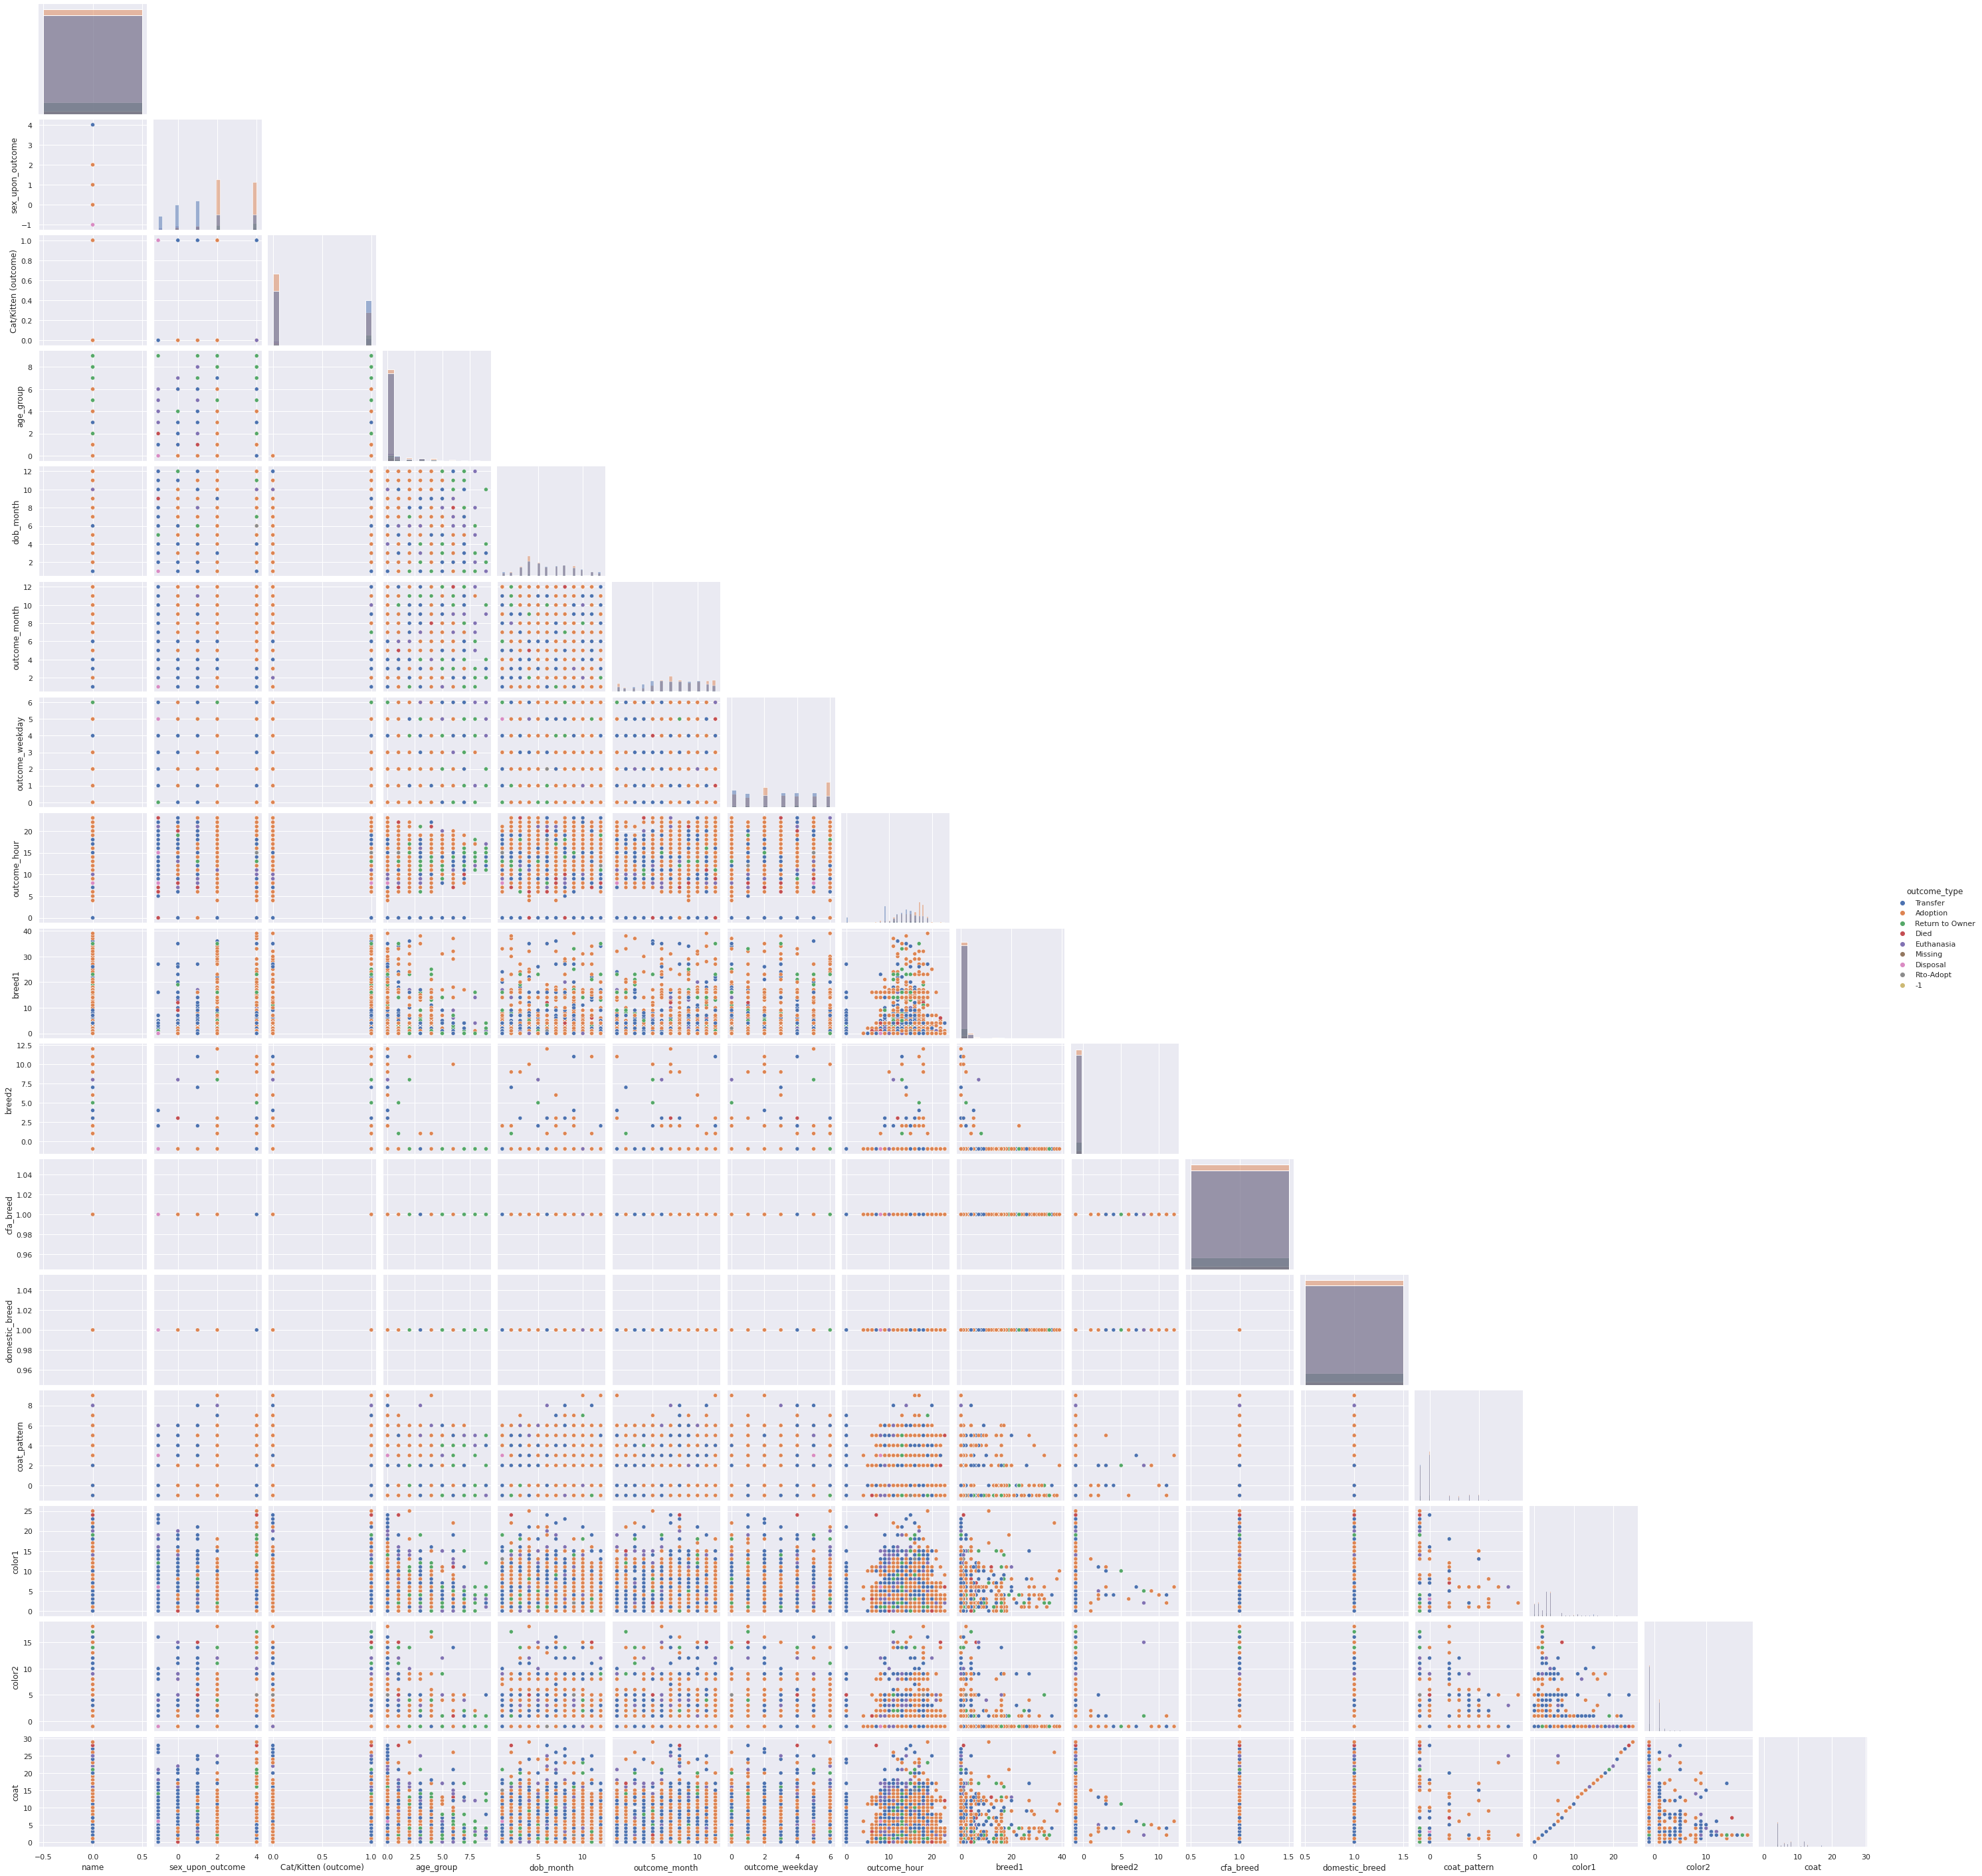

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(20,20)})
sns.pairplot(cat_df, hue=label, diag_kind="hist", corner=True)
plt.xticks(rotation=90)
plt.show()